In [1]:
%matplotlib notebook
from scipy import ndimage
from scipy import misc
import imageio
import numpy as np
import matplotlib.pyplot as plt
import copy
import astropy
from astropy.io import fits

In [2]:
bias1= astropy.io.fits.open('bias/Bias1.fit')
bias2= astropy.io.fits.open('bias/Bias2.fit')
bias3= astropy.io.fits.open('bias/Bias3.fit')

In [3]:
master_bias= np.mean(np.array([bias1[0].data,bias2[0].data,bias3[0].data]), axis=0)

In [4]:
bias1= None
bias2= None
bias3= None

In [5]:
dark1= astropy.io.fits.open('darks/Dark1.fit')
dark2= astropy.io.fits.open('darks/Dark2.fit')
dark3= astropy.io.fits.open('darks/Dark3.fit')

In [6]:
darklist= np.array([dark1[0].data, dark2[0].data, dark3[0].data]) - master_bias

In [7]:
dark1 = None
dark2 = None
dark3 = None
master_bias=None

In [8]:
master_dark= np.median(darklist, axis=0)

In [9]:
darklist=None

In [10]:
bias1= astropy.io.fits.open('bias/Bias1.fit')
bias2= astropy.io.fits.open('bias/Bias2.fit')
bias3= astropy.io.fits.open('bias/Bias3.fit')

In [11]:
master_bias= np.mean(np.array([bias1[0].data,bias2[0].data,bias3[0].data]), axis=0)

In [12]:
bias1= None
bias2= None
bias3= None

In [13]:
darkybias= master_dark + master_bias

In [14]:
master_dark=None
master_bias=None

In [15]:
flatr1= astropy.io.fits.open('flats/r/Flatr1.fit')
flatr2= astropy.io.fits.open('flats/r/Flatr2.fit')
flatr3= astropy.io.fits.open('flats/r/Flatr3.fit')

In [16]:
flatrlist= np.mean(np.array([flatr1[0].data, flatr2[0].data, flatr3[0].data]), axis=0)

In [17]:
flatr1= None
flatr2= None
flatr3= None

In [18]:
master_flat_r= (flatrlist - darkybias)/(np.median(flatrlist - darkybias))

In [19]:
r1= astropy.io.fits.open('lights/r1.fit')
r1redux= np.divide(r1[0].data - darkybias, master_flat_r)

In [20]:
r2= astropy.io.fits.open('lights/r2.fit')
r2redux= np.divide(r2[0].data - darkybias, master_flat_r)

In [21]:
r4= astropy.io.fits.open('lights/r4.fit')
r4redux= np.divide(r4[0].data - darkybias, master_flat_r)

In [22]:
flatrlist=None
darkybias=None
r1=None
r2=None
r4=None

In [23]:
r1redux.shape

(4096, 4096)

In [24]:
r2redux.shape

(4096, 4096)

In [25]:
r4redux.shape

(4096, 4096)

In [26]:
print(np.mean(master_flat_r))
print(np.std(master_flat_r))

0.9732283947736915
0.1341308152007226


In [27]:
master_flat_r=None

<IPython.core.display.Javascript object>


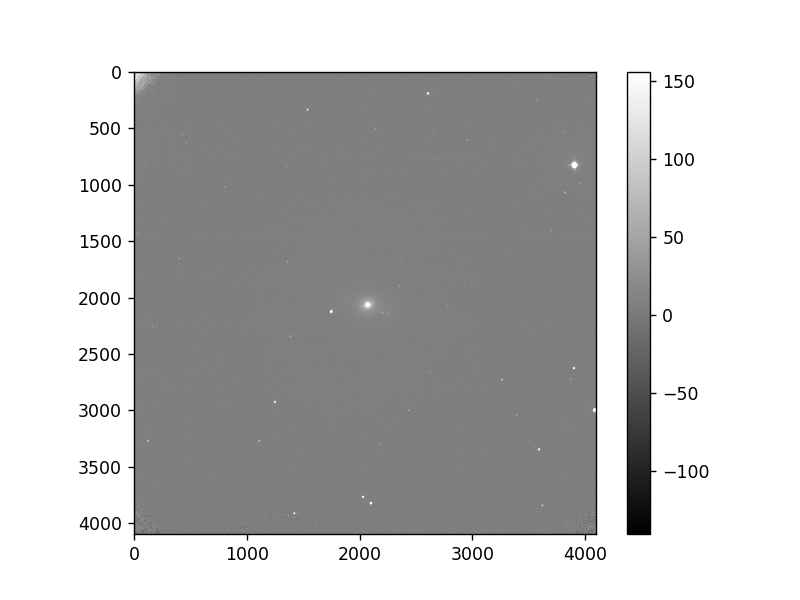

In [28]:
#test= astropy.io.fits.open('')
#data= test[0].data
plt.imshow(r1redux,cmap='gray',vmin=np.mean(r1redux)-np.std(r1redux),vmax=np.mean(r1redux)+np.std(r1redux))
plt.colorbar()
plt.show()

<IPython.core.display.Javascript object>


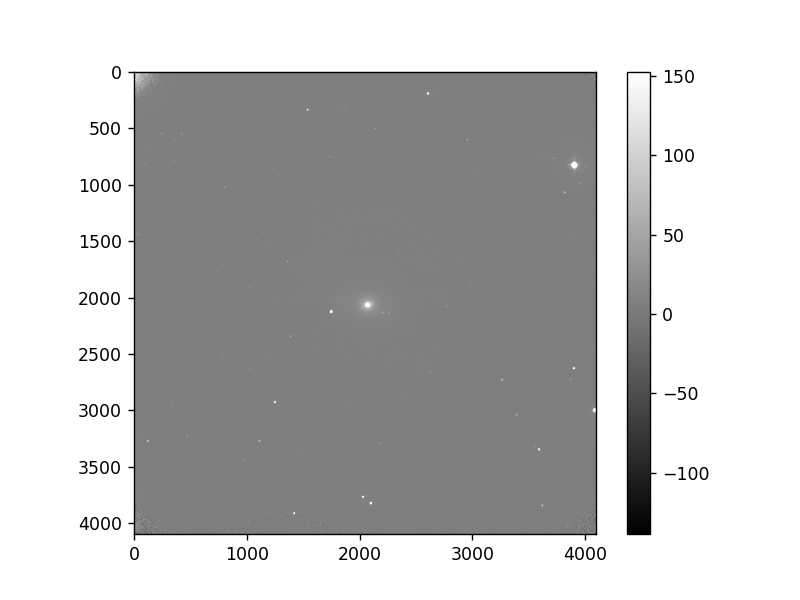

In [29]:
#test= astropy.io.fits.open('')
#data= test[0].data
plt.imshow(r2redux,cmap='gray',vmin=np.mean(r2redux)-np.std(r2redux),vmax=np.mean(r2redux)+np.std(r2redux))
plt.colorbar()
plt.show()

<IPython.core.display.Javascript object>


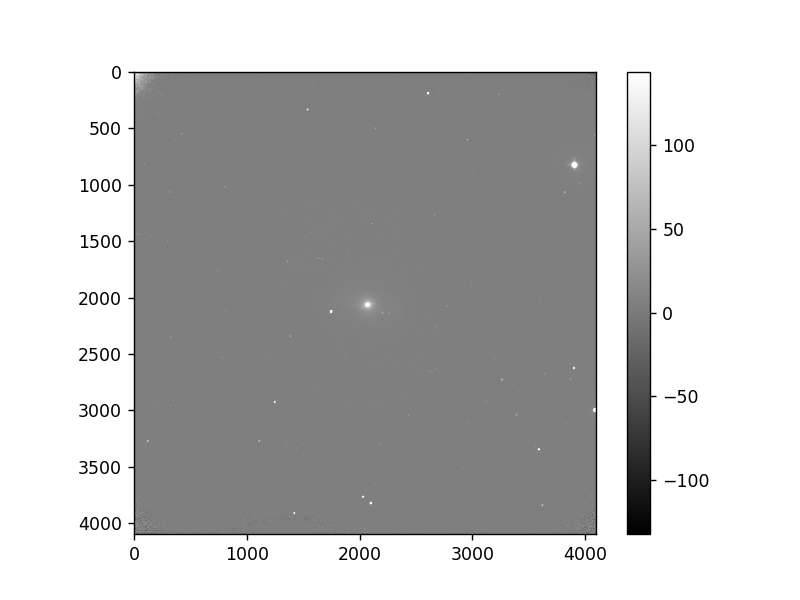

In [30]:
#test= astropy.io.fits.open('')
#data= test[0].data
plt.imshow(r4redux,cmap='gray',vmin=np.mean(r4redux)-np.std(r4redux),vmax=np.mean(r4redux)+np.std(r4redux))
plt.colorbar()
plt.show()